# Imports

In [1]:
#Imports
%matplotlib widget
import pandas as pd
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import scipy
import datetime
import networkx as nx
import misc
import math
import random
import SmallBucket
import BigBucket
import RandomWarmUp1
import RandomWarmUp2
import StaticDynamic
import DcOrient

# Data Generation

In [2]:
#Create empty graph
G = nx.Graph()

In [3]:
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

G.add_edges_from([
    (0,1),
    (1,2),
    (2,3),
    (3,4),
    (4,5),
    (5,6),
    (6,7),
    (7,8),
    (8,9),
    (9,0),

    (0,2),
    (0,3),
    (0,4),
    (1,3)
])

In [4]:
G = nx.Graph()

In [5]:
G = misc.createRandomGraph(size=30, density=0.4, maxDegree=1000)
misc.graphInfo(G)

Chosen max degree does not fall into range (16, 36) permitted by other parameters, so picking closest value instead
Nodes: 37
Edges: 292
Density: 0.43843843843843844
Max Degree: 36
Average Degree: 15.783783783783784
Static Coloring uses 9 colors


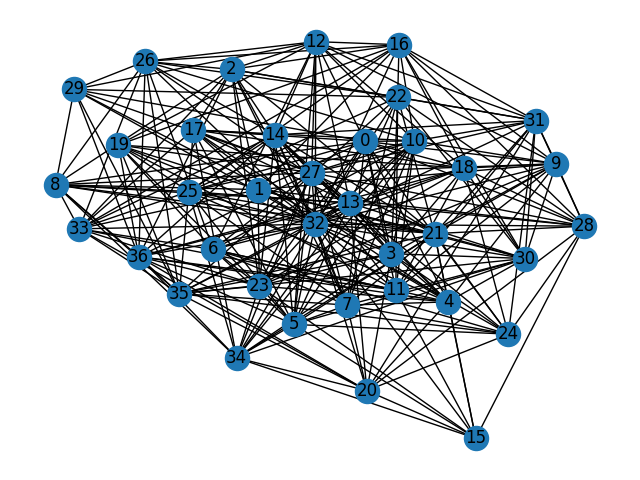

In [6]:
misc.draw(G)

# Common items

In [7]:
# Returns a coloring dictionary from the nodes 'color' attributes
def getColoring() -> dict:
    coloring: dict = {}
    for node in Gstar.nodes():
        coloring[node] = Gstar.nodes[node]['color']
    return coloring

In [8]:
# Print the current situation of the leveled segment data structure
def printLevels():
    print("l: " + str(l))
    print("c: " + str(c))

# Algorithm Specific Methods

In [9]:
def removeEdge(s, t):
    if not G.has_edge(s, t):    # Potentially redundant
        print("Edge not present in graph")
        return
    G.remove_edge(s, t)
    dcOrientDelete(s, t)

def removeVertex(v):

    if not G.has_node(v):   # Potentially redundant
        print("Node not present in graph")
        return
    G.remove_node(v)
    Gstar.remove_node(v)

def addEdge(s, t):

    if G.has_edge(s, t):    # Potentially redundant, but could be extended to also check if the vertices are present yet
        print("Edge already in the graph")
        return
    if (not G.has_node(s) or not G.has_node(t)):
        print("Not all nodes present in graph yet")
        return
    G.add_edge(s, t)
    dcOrientInsert(s,t)

def addVertex(v):
    if G.has_node(v):   # Potentially redundant, depending on the input used during the experiments
        print("Node already present in graph")
        return
    G.add_node(v)
    Gstar.add_node(v)
    Gstar.nodes[v]['color'] = 0
    Gstar.nodes[v]['DINC'] = DincIndex()

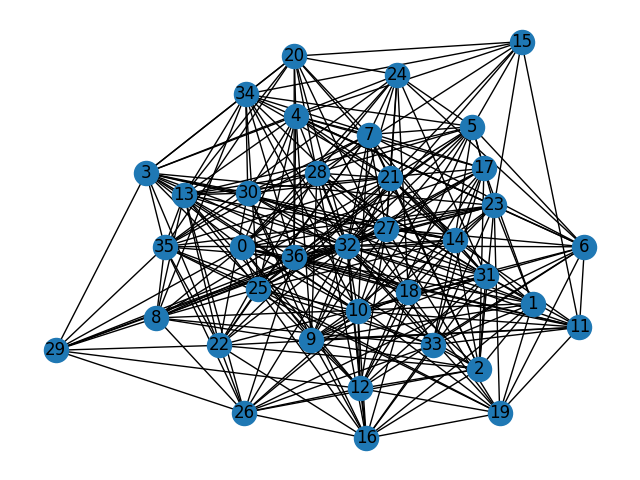

In [10]:
misc.draw(G)

In [11]:
updates = misc.extractUpdates(G, 'random')


In [12]:
Gp = nx.Graph()
Gp.add_nodes_from(G.nodes())
dco = DcOrient.DcOrientAlgo(Gp)
iterator = misc.UpdateIterator(dco, updates)

In [13]:
dco.Gstar.nodes[15]['DINC'].cu

set()

executing CAN step for node 16
cu is set()
cnt is {}
executing CAN step for node 30
cu is set()
cnt is {0: 1}
1
True
executing CAN step for node 7
cu is set()
cnt is {}
executing CAN step for node 14
cu is set()
cnt is {0: 1}
2
True
I.cnt is {0: 1}
decreasing color 0
I.cnt is {}
I.cu is {0}
executing CAN step for node 30
cu is {0}
cnt is {}
letting 31 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 31 now has cnt {0: 1}
letting 16 know about color update
I.cnt is {1: 1}
decreasing color 1
I.cnt is {}
I.cu is set()
Node 16 now has cnt {0: 1}
executing CAN step for node 16
cu is set()
cnt is {0: 1}
executing CAN step for node 31
cu is set()
cnt is {0: 1}
3
True
executing CAN step for node 7
cu is set()
cnt is {}
executing CAN step for node 35
cu is set()
cnt is {0: 1}
4
True
executing CAN step for node 0
cu is set()
cnt is {}
executing CAN step for node 9
cu is set()
cnt is {0: 1}
5
True
executing CAN step for node 31
cu is set()
cnt is {0: 1}
ex

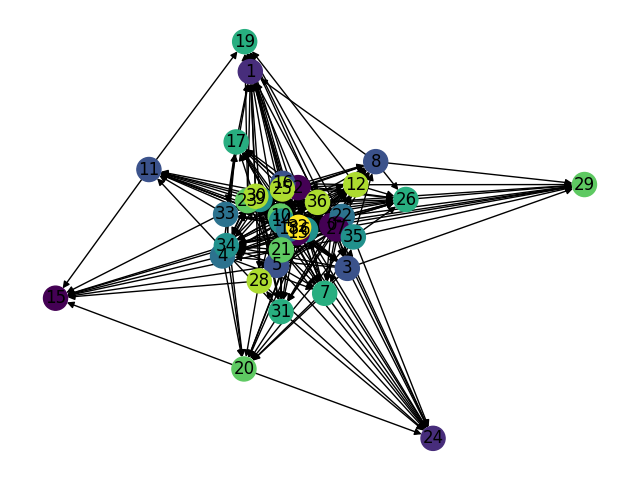

In [14]:
c1 = dco.getColoring()

while misc.verifyColoring(dco.G, dco.getColoring()):
    if iterator.runUpdate(1):
        c2 = dco.getColoring()
        print(misc.numberOfRecolors(c1, c2))
        print(misc.verifyColoring(dco.G, dco.getColoring()))
    else:
        print("all updates finished")
        break

misc.draw(dco.Gstar, dco.getColoring())


In [29]:
misc.verifyColoring(dco.G, dco.getColoring())

Edge not present in graph


True

In [16]:
misc.verifyColoring(dco.G, dco.getColoring())

True

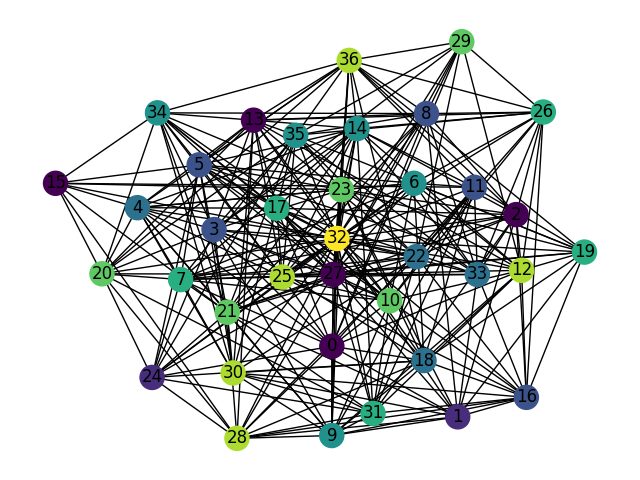

In [17]:
misc.draw(dco.G, dco.getColoring())

In [18]:
misc.numberOfColors(dco.getColoring())

9

In [19]:
Ge = nx.Graph()
Ge.add_nodes_from(G.nodes())
edges = list(G.edges())

In [20]:
misc.numberOfColors(nx.coloring.greedy_color(dco.G))

9

In [21]:
misc.extractUpdates(G, 'expanding')

[(4, 20),
 (15, 20),
 (20, 24),
 (18, 24),
 (21, 24),
 (0, 18),
 (11, 18),
 (0, 3),
 (20, 32),
 (16, 18),
 (30, 32),
 (15, 32),
 (32, 36),
 (17, 32),
 (21, 32),
 (18, 28),
 (32, 34),
 (10, 17),
 (24, 28),
 (18, 19),
 (20, 33),
 (17, 33),
 (21, 30),
 (24, 32),
 (2, 17),
 (5, 24),
 (2, 26),
 (2, 32),
 (21, 34),
 (15, 21),
 (9, 10),
 (18, 36),
 (0, 4),
 (9, 31),
 (7, 20),
 (7, 21),
 (13, 28),
 (29, 32),
 (18, 23),
 (9, 21),
 (3, 23),
 (4, 17),
 (20, 28),
 (9, 32),
 (12, 32),
 (32, 35),
 (8, 32),
 (3, 24),
 (25, 32),
 (7, 30),
 (18, 32),
 (17, 18),
 (13, 26),
 (13, 34),
 (13, 20),
 (4, 15),
 (7, 24),
 (10, 32),
 (6, 24),
 (1, 9),
 (32, 33),
 (4, 32),
 (4, 6),
 (6, 33),
 (27, 32),
 (0, 32),
 (3, 18),
 (24, 31),
 (19, 32),
 (30, 34),
 (22, 26),
 (0, 28),
 (3, 32),
 (7, 27),
 (2, 7),
 (26, 32),
 (6, 18),
 (4, 23),
 (14, 32),
 (0, 8),
 (8, 34),
 (6, 27),
 (9, 18),
 (14, 33),
 (34, 36),
 (2, 14),
 (23, 33),
 (16, 33),
 (14, 31),
 (5, 10),
 (9, 11),
 (0, 24),
 (30, 35),
 (3, 20),
 (25, 35),
 (16

In [22]:
int(random.uniform(0, 100))

27

In [23]:
sda = StaticDynamic.StaticDynamicAlgo(Ge, 2, True)
layout = nx.spring_layout(G)
updi = misc.UpdateIterator(sda, misc.extractUpdates(G, 'prioritized'))

full reset


In [24]:
misc.extractUpdates(G, 'prioritized')

[(6, 23),
 (10, 34),
 (14, 32),
 (15, 28),
 (8, 33),
 (13, 30),
 (5, 21),
 (6, 11),
 (10, 16),
 (5, 36),
 (1, 21),
 (10, 11),
 (15, 34),
 (20, 33),
 (19, 23),
 (15, 23),
 (17, 25),
 (4, 7),
 (9, 18),
 (5, 12),
 (16, 26),
 (16, 33),
 (21, 25),
 (3, 23),
 (2, 33),
 (3, 10),
 (7, 24),
 (21, 28),
 (4, 21),
 (3, 22),
 (19, 27),
 (10, 27),
 (5, 24),
 (8, 25),
 (14, 36),
 (29, 36),
 (8, 13),
 (13, 22),
 (20, 24),
 (13, 25),
 (4, 36),
 (18, 28),
 (22, 26),
 (10, 17),
 (4, 6),
 (11, 14),
 (20, 32),
 (9, 28),
 (0, 18),
 (4, 15),
 (30, 34),
 (2, 23),
 (21, 27),
 (3, 30),
 (6, 33),
 (2, 16),
 (6, 19),
 (26, 29),
 (27, 32),
 (2, 12),
 (11, 15),
 (5, 15),
 (3, 29),
 (5, 32),
 (26, 33),
 (16, 19),
 (18, 24),
 (17, 27),
 (22, 32),
 (24, 27),
 (14, 25),
 (15, 32),
 (13, 20),
 (19, 36),
 (22, 35),
 (0, 23),
 (1, 33),
 (9, 10),
 (20, 36),
 (8, 29),
 (12, 27),
 (21, 35),
 (35, 36),
 (18, 32),
 (11, 18),
 (0, 32),
 (1, 28),
 (27, 28),
 (0, 29),
 (25, 35),
 (22, 25),
 (13, 28),
 (13, 17),
 (12, 29),
 (27, 3

True


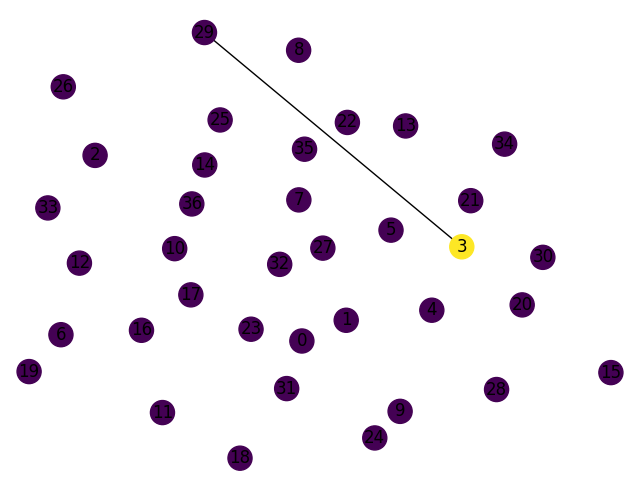

In [25]:
updi.runUpdate(1)
print(misc.verifyColoring(updi.G, updi.getColoring()))
misc.draw(updi.G, updi.getColoring(), pos=layout)

In [26]:
updi.algo.DBB.getColoring()

{0: 0,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0}